In [82]:
import scipy.stats as stats

Z = (9.57-9.5)*(160**0.5)/0.4
print(Z)

2.2135943621178744


In [83]:

round(2*(1-stats.norm.cdf(Z)), 4)

0.0269

In [84]:
Z = (9.57-9.5)/0.4/(160**0.5)
print(Z)

0.013834964763236715


In [85]:
round(2*(1-stats.norm.cdf(Z)), 4)

0.989

# task 6

In [10]:
file = open('diamonds.txt', 'r')

In [11]:
A = file.readlines()

In [15]:
Carat = []
Depth = []
Table = []
Price = []
x = []
y = []
z = []
for i in range(1, len(A)):
    Carat.append(float(A[i].split()[0]))
    Depth.append(float(A[i].split()[1]))
    Table.append(float(A[i].split()[2]))
    Price.append(float(A[i].split()[3]))
    x.append(float(A[i].split()[4]))
    y.append(float(A[i].split()[5]))
    z.append(float(A[i].split()[6]))
    

In [25]:
import pandas as pd
import numpy as np

Fingerprint = []
for i in range(len(x)):
    Temp = []
    Temp.append(Carat[i])
    Temp.append(Depth[i])
    Temp.append(Table[i])
    Temp.append(x[i])
    Temp.append(y[i])
    Temp.append(z[i])
    Fingerprint.append(Temp)


Data = pd.DataFrame(np.array(Fingerprint))
y = pd.DataFrame(np.array(Price))

In [27]:
Data.head()

,0,1,2,3,4,5
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [28]:
y.head()

,0
0,326.0
1,326.0
2,327.0
3,334.0
4,335.0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.25, random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

MAE_lin = np.abs(y_pred - y_test)
print(np.array(MAE_lin[:][0]))

[ 214.42235621 1016.46053685   41.87871693 ... 2171.49180326  103.82818096
  159.32529706]


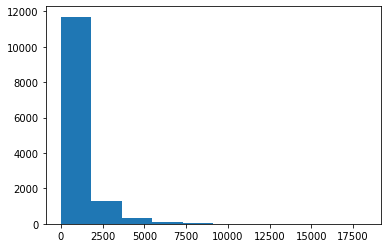

In [39]:
import matplotlib.pyplot as plt
plt.hist(np.array(MAE_lin[:][0]))
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor

#for_reg = RandomForestRegressor(n_estimators = 10, random_state=1)
for_reg = RandomForestRegressor(random_state=1)
for_reg.fit(X_train, y_train)
y_pred = for_reg.predict(X_test)
print(len(y_pred))
print(len(y_test))

MAE_for = np.abs(y_pred - y_test[:][0])

C:\Users\Mi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


13485
13485


In [52]:
np.array(MAE_for)

array([ 294.55, 1291.6 ,  453.2 , ..., 1426.  ,  298.7 ,  281.1 ])

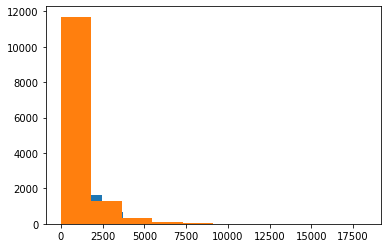

In [54]:
plt.hist(np.array(MAE_for))
plt.hist(np.array(MAE_lin[:][0]))
plt.show()

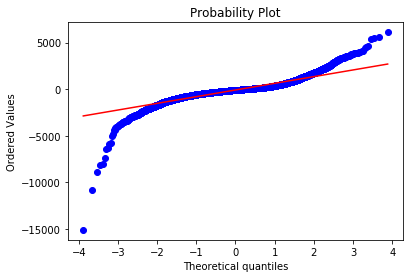

In [59]:
import scipy.stats as stats

stats.probplot(np.array(MAE_for) - np.array(MAE_lin[:][0]), dist = "norm", plot = plt)
plt.show()

In [61]:
stats.shapiro(np.array(MAE_for) - np.array(MAE_lin[:][0]))

C:\Users\Mi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8444892168045044, 0.0)

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [64]:
stats.ttest_rel(np.array(MAE_for), np.array(MAE_lin[:][0]))

Ttest_relResult(statistic=-13.017729783879505, pvalue=1.6551745751211468e-38)

In [68]:
from statsmodels.stats.weightstats import *

DescrStatsW(np.array(MAE_lin[:][0]) - np.array(MAE_for)).tconfint_mean()

(74.28724532596044, 100.62452098634884)

In [71]:
stats.ttest_rel(abs(np.array(y_test) - np.array(reg.predict(X_test))), 
                abs(np.array(y_test) - np.array(for_reg.predict(X_test))))

Ttest_relResult(statistic=array([ -81.30525919, -173.35519425,  -80.41470841, ..., -124.45157698,
        -98.80306356,  -79.20639336]), pvalue=array([0., 0., 0., ..., 0., 0., 0.]))